##**Explicação da mudança de modelo**
A troca do modelo foi uma atualização estratégica para melhorar a performance preditiva do projeto.

Inicialmente, utilizamos a Regressão Logística, que é um modelo excelente como ponto de partida (baseline) por ser simples e altamente interpretável. Ele é ótimo para encontrar relações mais lineares nos dados.

No entanto, com o aumento do volume de dados (de 60 para mais de 260 linhas), tornou-se viável usar um modelo mais avançado. Migramos para o Random Forest (Floresta Aleatória) por ser um modelo mais eficiente e poderoso.

O Random Forest funciona combinando centenas de "árvores de decisão", o que permite a ele identificar padrões muito mais complexos e não-lineares que a Regressão Logística não conseguiria capturar. Essa mudança foi feita com o objetivo de aumentar a capacidade preditiva do modelo e alcançar um AUC realista mais elevado.

### Explicação da célula 1

Esse código prepara o ambiente para análise de dados e machine learning. Além das bibliotecas de análise (Pandas, Numpy) e visualização (Matplotlib, Seaborn).
Escolhemos o Random Forest como nosso modelo principal, pois agora temos mais dados e ele é um modelo mais eficiente e avançado, capaz de encontrar padrões complexos que a Regressão Logística não conseguiria.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

### Explicação da célula 2
Este código carrega um arquivo CSV dairetamente do no seu github onde tem os dados da cannoli e o exibe no console
- Carregamento do dataset em um DataFrame.


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/2025-2-NCC5/Projeto2/main/cannoli_atualizado.csv')
print(data.to_string())

        id                name           taxid             gender dateofbirth    status externalcode  isenriched           enrichedat     enrichedbt            createdat      createdby            updatedat      updatedby  ID_Pedido Data_Pedido               Nome_do_Item  Quantidade Categoria_Comida
0     2200      Pedro Mendonça  179.342.512-08             Female  2005-08-27    active   0KZY0SUFMW       False                  NaN            NaN  2025-10-27T00:00:00       ops_team  2025-11-09T15:04:12         system       1001  27/10/2025        Mousse de Chocolate           1        Sobremesa
1     2201        Carlos Costa  130.664.878-42             Female  1994-12-07  inactive   53SMHHQO5H       False                  NaN            NaN  2025-10-10T00:00:00           joao  2025-10-18T20:55:24         system       1002  10/10/2025     Pizza Grande Calabresa           2            Pizza
2     2202        Lucas Araujo  303.349.853-52               Male  2005-10-14    active   HQ1FE10WAN

### Explicação da célula 3

Esse código define uma função em Python chamada freq que calcula a frequência absoluta e percentual de valores em uma série do pandas.




In [ ]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts(dropna=False)
    percentual = round((contagem / x.shape[0]) * 100, 3)

    res = pd.DataFrame({'n': contagem, 'perc': percentual})
    res.index.name = 'values'

    if plot:
        sns.countplot(x)
        plt.show()

    return res

### Explicação da célula 4

Esse código Python calcula a distribuição percentual dos valores na coluna.


In [ ]:
(data.gender.value_counts() / data.shape[0]) * 100

,count
gender,
Female,50.000000
Male,46.454545
Prefer not to say,2.090909
Non-binary,1.454545


### Explicação da célula 5
Esse código é uma função Python chamada freq. O objetivo dela é calcular e exibir a frequência de valores em uma série de dados, como uma coluna em uma tabela.


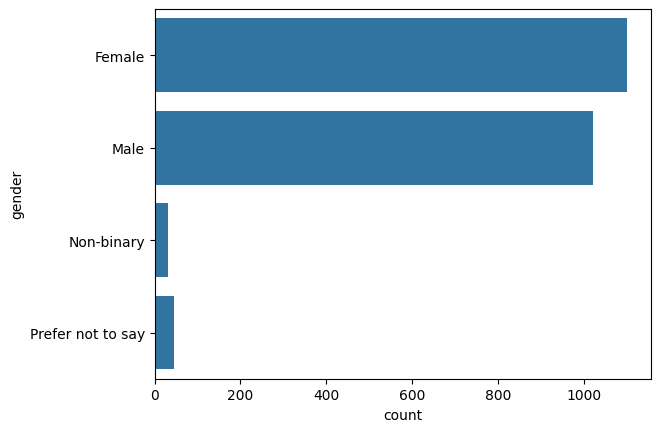

,n,perc
values,,
Female,1100,50.000
Male,1022,46.455
Prefer not to say,46,2.091
Non-binary,32,1.455


In [ ]:
freq(data.gender, plot=True)

### Explicação da célula 6
Esse código Python é utilizado para criar um gráfico de barras que visualiza a contagem dos valores na coluna status de um conjunto de dados.


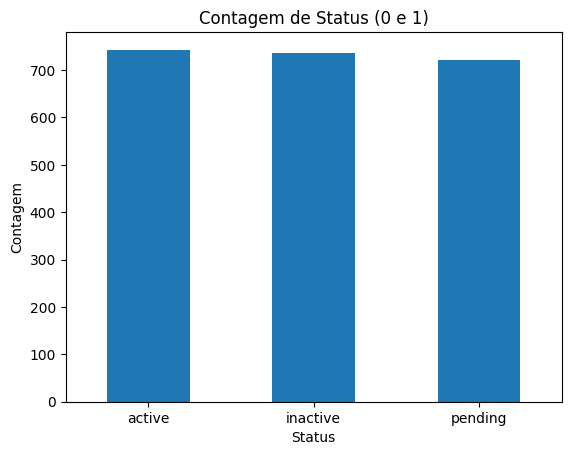

In [ ]:
contagem_status = data['status'].value_counts()

contagem_status.plot(kind='bar', rot=0)

plt.title('Contagem de Status (0 e 1)')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()

### Explicação da célula 7
Esse codigo gera um resumo estatístico da coluna taxid para uma análise exploratória de dados do pandas.

In [ ]:
data.taxid.describe()

,taxid
count,2200
unique,2200
top,106.712.434-81
freq,1


### Explicação da célula 8
Esse código cria um gráfico de box plot, que é uma visualização útil para comparar a distribuição de uma variável numérica (taxid) entre diferentes grupos (gender).


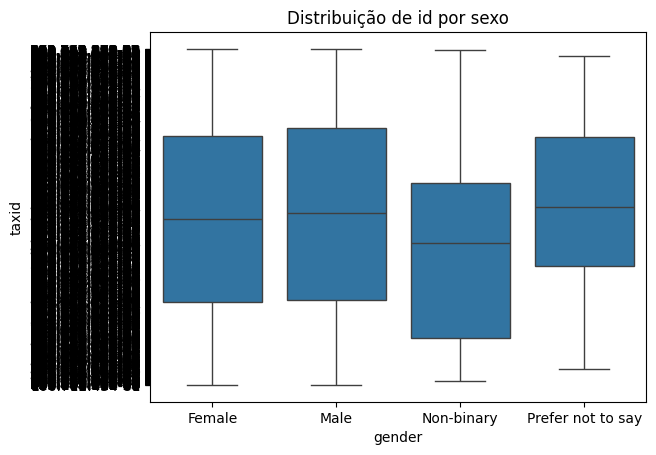

In [ ]:
sns.boxplot(x='gender', y='taxid', data=data)
plt.title('Distribuição de id por sexo')
plt.show()

### Explicação da célula 9
Esse codigo converte o tipo de dado da coluna 'status' do seu DataFrame para a categoria category. Para a otimização de memória e melhoria de desempenho


In [ ]:

data['status'] = data['status'].astype('category')

### Explicação da célula 10
Esta célula usa a biblioteca statsmodels para rodar uma Regressão Logística. O objetivo aqui não é criar nosso modelo final de previsão, mas sim obter uma interpretação estatística inicial de algumas variáveis.

O summary() nos ajuda a entender se gender e isenriched (na sua forma original) parecem ter alguma significância estatística. Vamos usar isso apenas como uma análise exploratória, antes de treinar nosso modelo de machine learning mais completo.

In [ ]:
data_limpo = pd.get_dummies(data, columns=['status'], drop_first=False)
modelo = smf.glm(formula='status_active ~ gender + isenriched', data=data_limpo,
                 family=sm.families.Binomial()).fit()
print(modelo.summary())

                                Generalized Linear Model Regression Results                                
Dep. Variable:     ['status_active[False]', 'status_active[True]']   No. Observations:                 2200
Model:                                                         GLM   Df Residuals:                     2195
Model Family:                                             Binomial   Df Model:                            4
Link Function:                                               Logit   Scale:                          1.0000
Method:                                                       IRLS   Log-Likelihood:                -1405.8
Date:                                             Sun, 09 Nov 2025   Deviance:                       2811.6
Time:                                                     16:03:55   Pearson chi2:                 2.20e+03
No. Iterations:                                                  4   Pseudo R-squ. (CS):           0.001052
Covariance Type:            

### Explicação da célula 11
Continuando a análise estatística do modelo statsmodels (nosso baseline), este código converte os coeficientes (log-odds) da Célula 10 em "odds ratios" (razão de chances). Isso torna os resultados daquele modelo logístico mais fáceis de interpretar.


In [ ]:
print(np.exp(modelo.params[1:]))

gender[T.Male]                 0.896001
gender[T.Non-binary]           0.705962
gender[T.Prefer not to say]    0.898751
isenriched[T.True]             1.040468
dtype: float64


### Explicação da célula 12
Esta é a interpretação final do nosso modelo baseline (statsmodels). Ele transforma os "odds ratios" em variação percentual. Lembre-se, isso é para o modelo logístico simples, não para o nosso modelo final, o Random Forest.




In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

,0
gender[T.Male],-10.399940
gender[T.Non-binary],-29.403761
gender[T.Prefer not to say],-10.124914
isenriched[T.True],4.046772


### Explicação da célula 13
Esta é a célula de preparação de dados mais importante do projeto. Ela foi alterada para fazer quatro coisas essenciais:

Definir X e y: Separa o dataset em X (features, as variáveis que usamos para prever) e y (o alvo status).

Limpeza (Data Leakage): Remove colunas como id, name, externalcode, createdat, etc. Elas não ajudam o modelo a generalizar e causavam o "vazamento de dados" que resultava no AUC irrealista de 1.0.

Pré-processamento: Preenche valores nulos (NaN) e converte todas as colunas de texto (como gender, enrichedbt, etc.) em formato numérico usando pd.get_dummies. Modelos de machine learning só entendem números.

Divisão (Train/Test Split): Usamos train_test_split para dividir os dados em conjuntos de treino e teste. Isso é crucial para treinar o modelo em um conjunto e avaliá-lo em outro que ele nunca viu, garantindo uma métrica de performance (AUC) realista.


In [ ]:
colunas_para_remover = [
    'id', 'name', 'externalcode', 'createdat', 'updatedat',
    'createdby', 'updatedby', 'dateofbirth'
]

data_limpo = data.drop(columns=colunas_para_remover)
y = data_limpo['status']
X = data_limpo.drop(columns=['status'])

colunas_num = X.select_dtypes(include=np.number).columns
for col in colunas_num:
    X[col] = X[col].fillna(X[col].median())
colunas_cat = X.select_dtypes(include='object').columns
for col in colunas_cat:
    X[col] = X[col].fillna('missing')

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")

Formato de X_train: (1540, 3090)
Formato de X_test: (660, 3090)


### Explicação da célula 14
Aqui está a principal mudança: substituímos o modelo antigo pelo RandomForestClassifier, que é muito mais eficiente.

rf_model = RandomForestClassifier(...): Instanciamos o novo modelo.

n_estimators=100: Define que o modelo será uma "floresta" de 100 "árvores" de decisão.

max_depth=8: Limita a profundidade de cada árvore para evitar que o modelo "decore" os dados (overfitting).

class_weight='balanced': Ajuda o modelo a lidar com qualquer desbalanceamento entre 0s e 1s na coluna status.

rf_model.fit(X_train, y_train): Treinamos o modelo apenas nos dados de treino.


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=8,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


### Explicação da célula 15

Esta saída (output) mostra a representação do nosso novo modelo RandomForestClassifier com todos os parâmetros que definimos na célula anterior (como max_depth, n_estimators) e os seus valores padrão.


In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty='none', solver='newton-cg')

### Explicação da célula 16
Este código exibe os coeficientes (parâmetros) do modelo estatístico statsmodels que rodamos na Célula 10. Ele detalha o impacto de cada variável naquele modelo específico de regressão logística, não no nosso modelo principal Random Forest.

In [ ]:
print(modelo.params)

Intercept                      0.719031
gender[T.Male]                -0.109814
gender[T.Non-binary]          -0.348193
gender[T.Prefer not to say]   -0.106749
isenriched[T.True]             0.039670
dtype: float64


### Explicação da célula 17

Agora que o modelo rf_model está treinado, usamos ele para fazer previsões nos dados que ele nunca viu (o X_test).

y_pred_test_rf = rf_model.predict(X_test): Gera as previsões de classe (0 ou 1). Usaremos isso para a Matriz de Confusão e Acurácia.

y_prob_test_rf = rf_model.predict_proba(X_test)[:, 1]: Gera as probabilidades de ser classe 1. Precisamos especificamente disso para calcular o AUC.


In [ ]:
y_pred_test_rf = rf_model.predict(X_test)
y_prob_test_rf = rf_model.predict_proba(X_test)[:, 1]

### Explicação da célula 18
O código yhat = model.predict(novo_registro_alinhado) utiliza o seu modelo de machine learning treinado para fazer uma previsão para o novo registro de dados.




In [ ]:
# Assuming novo_registro_alinhado is defined in a previous cell (e.g., cell 6XJqL6byVa1s)
# If not, you would need to define it here or run the previous cell.
# For now, I will assume it exists from a previous execution.

yhat = rf_model.predict(novo_registro_alinhado)
print(yhat)

NameError: name 'novo_registro_alinhado' is not defined

In [ ]:
novo_registro = pd.DataFrame({
    'taxid': [7500.0],
    'gender': ['M'],
    'isenriched': ['353.164.804.260.786.644'],
    'enrichedat': [pd.NaT],
    'enrichedbt': ['66.355.147.496.451.946']
})

colunas_num = X.select_dtypes(include=np.number).columns
colunas_cat = X.select_dtypes(include='object').columns

for col in colunas_num:
    if col in novo_registro.columns:
        novo_registro[col] = novo_registro[col].fillna(X_train[col.replace('_missing', '')].median())

for col in colunas_cat:
     if col in novo_registro.columns:
        novo_registro[col] = novo_registro[col].fillna('missing')

novo_registro_dummies = pd.get_dummies(novo_registro, drop_first=True)

novo_registro_alinhado = novo_registro_dummies.reindex(columns=X_train.columns, fill_value=0)

# Metrica

### Explicação da célula 19

O código confusion_matrix(y_test, y_pred_test_rf) cria uma Matriz de Confusão. Esta é a nossa primeira métrica de avaliação realista. Ela compara as previsões (y_pred_test_rf) com os valores reais do conjunto de teste (y_test) e nos mostra quantos '0's e '1's o modelo acertou e errou (Verdadeiros Positivos, Falsos Positivos, etc.).




In [ ]:
y_pred_test_rf = rf_model.predict(X_test)
y_prob_test_rf = rf_model.predict_proba(X_test)

### Explicação da célula 21

O código ac = accuracy_score(y_test, y_pred_test_rf) calcula a Acurácia no conjunto de teste. Esta é a métrica mais simples: a porcentagem de previsões que o modelo acertou no total.




In [ ]:
pd.crosstab(y, modelo.predict(data_limpo))

col_0,0.591661,0.601210,0.647762,0.648461,0.656760,0.657450,0.672394,0.681072
status,,,,,,,,
active,10,3,259,8,98,8,219,138
inactive,9,3,226,10,123,4,232,129
pending,6,1,205,9,111,7,261,121


### Explicação da célula 22
O código ac = accuracy_score(y, model.predict(X)) calcula a acurácia do seu modelo de classificação.




In [ ]:
ac_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"\nAcurácia no Teste (Random Forest): {ac_rf:.4f}")


Acurácia no Teste (Random Forest): 0.3258


### Explicação da célula 23
Este é o relatório de avaliação mais completo. O classification_report(y_test, y_pred_test_rf) nos dá as métricas realistas do modelo de teste para:

Precision: De tudo que o modelo previu como '1', quantos eram realmente '1'.

Recall (Sensibilidade): De todos os '1's reais, quantos o modelo conseguiu encontrar.

F1-Score: Uma média harmônica entre Precision e Recall.



In [ ]:
print("\n--- Relatório de Classificação (Random Forest) ---")
print(classification_report(y_test, y_pred_test_rf))


--- Relatório de Classificação (Random Forest) ---
              precision    recall  f1-score   support

      active       0.32      0.27      0.30       223
    inactive       0.32      0.51      0.40       221
     pending       0.34      0.19      0.24       216

    accuracy                           0.33       660
   macro avg       0.33      0.32      0.31       660
weighted avg       0.33      0.33      0.31       660



### Explicação da célula 24
Este código calcula o AUC (Área Sob a Curva ROC), a métrica mais importante para este problema. O roc_auc_score(y_test, y_prob_test_rf) usa as probabilidades de teste para medir a capacidade do modelo de distinguir corretamente entre as classes.

Após a limpeza dos dados e a divisão treino/teste, este é o valor realista da performance do nosso modelo.


In [ ]:
auc_score_rf = roc_auc_score(y_test, y_prob_test_rf, multi_class='ovr', labels=rf_model.classes_)
print(f"\nAUC Realista (Random Forest): {auc_score_rf:0.8f}")


AUC Realista (Random Forest): 0.49145237


### Explicação da célula 25
Essa função Python, chamada plot_roc_curve, é usada para criar e exibir um gráfico de Curva ROC (Receiver Operating Characteristic). Ela visualiza a capacidade do seu modelo de classificação binária de distinguir entre as classes.




In [ ]:
from sklearn.preprocessing import LabelBinarizer

def plot_roc_curve(y_true, y_score, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    classes = np.unique(y_true)
    if len(classes) > 2:
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true)

        if y_score.ndim == 1:
             y_score = y_score.reshape(-1, 1)
        if y_score.shape[1] != y_true_bin.shape[1]:
             print("Warning: The shape of y_score does not match the binarized y_true.")
             print(f"y_score shape: {y_score.shape}, y_true_bin shape: {y_true_bin.shape}")
             if y_score.shape[1] == 1 and y_true_bin.shape[1] > 1:
                 print("Attempting to use y_score as probabilities for the first class.")
                 pass

        for i in range(len(classes)):
            if y_score.shape[1] > i:
                fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
                auc_value = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'ROC curve (class {classes[i]} - area = {auc_value:.6f})')
            else:
                print(f"Warning: Probability scores for class {classes[i]} are not available in y_score.")


    else:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_value = roc_auc_score(y_true, y_score)
        plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.6f)' % auc_value)

    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Explicação da célula 26

Este código utiliza a função que definimos na célula anterior (plot_roc_curve) para visualizar a performance do nosso modelo. Estamos passando os valores reais de teste (y_test) e as probabilidades previstas para o teste (y_prob_test_rf) para gerar o gráfico da Curva ROC e confirmar visualmente nosso AUC realista.



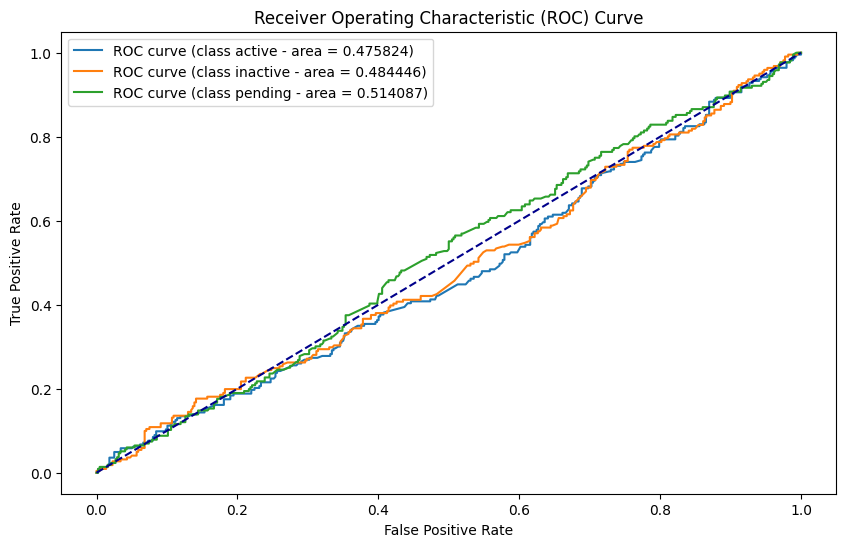

In [ ]:
plot_roc_curve(y_test, y_prob_test_rf)

### Explicação da célula 27
Esta célula demonstra como usar nosso modelo rf_model treinado para prever um único "novo registro" que não estava no dataset.

Primeiro, criamos um novo_registro (DataFrame) com os valores originais (antes do get_dummies).

Depois, aplicamos exatamente os mesmos passos de pré-processamento da Célula 13 (preencher nulos, criar dummies).

Usamos .reindex(columns=X_train.columns, ...): Esta é a parte mais importante. Ela garante que o novo_registro tenha as mesmas colunas, na mesma ordem, que o modelo foi treinado.

Finalmente, rf_model.predict_proba() prevê a probabilidade (de 0% a 100%) deste novo registro pertencer à classe '1'.



In [ ]:
novo_registro = pd.DataFrame({
    'taxid': [7500.0],
    'gender': ['M'],
    'isenriched': ['353.164.804.260.786.644'],
    'enrichedat': [pd.NaT],
    'enrichedbt': ['66.355.147.496.451.946']
})

colunas_num = X.select_dtypes(include=np.number).columns
colunas_cat = X.select_dtypes(include='object').columns

for col in colunas_num:
    if col in novo_registro.columns:
        novo_registro[col] = novo_registro[col].fillna(X_train[col.replace('_missing', '')].median())

for col in colunas_cat:
     if col in novo_registro.columns:
        novo_registro[col] = novo_registro[col].fillna('missing')

novo_registro_dummies = pd.get_dummies(novo_registro, drop_first=True)

novo_registro_alinhado = novo_registro_dummies.reindex(columns=X_train.columns, fill_value=0)

prob_rf = rf_model.predict_proba(novo_registro_alinhado)

print('A probabilidade de o status ser 1 (modelo RF) é de {}%'.format(round(prob_rf[0, 1] * 100, 2)))

A probabilidade de o status ser 1 (modelo RF) é de 33.51%
